In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
air = pd.read_csv('airline-twitter-sentiment/Tweets.csv')
important_words =['accessable', 'accomplished', 'adaptable', 'admiringly', 'adulation', 'advocated', 'affirmation', 'agility',
       'amazed', 'amiability', 'amusing', 'appreciated', 'articulate', 'astonished', 'attraction', 'available',
       'awesomely', 'beautifully', 'benefactor', 'best', 'blessing', 'bonus', 'brave', 'brighten', 'buoyant',
       'carefree', 'charisma', 'cheerful', 'clarity', 'cleared', 'colorful', 'commitment', 'complemented', 'confident',
       'constructive', 'convienient', 'correctly', 'courtly', 'cushy', 'dawn', 'dedicated', 'delicacy', 'deservedly',
       'dextrous', 'distinctive', 'doubtless', 'earnest', 'easy', 'ecstatic', 'efficiently', 'elatedly', 'eloquently',
       'enchanting', 'endorsement', 'enhanced', 'enlighten', 'enterprising', 'enthusiastic', 'enviably', 'eulogize',
       'exaltation', 'exceeding', 'excellent', 'excites', 'exonerate', 'exuberance', 'eyecatching', 'faithfulness',
       'fantastic', 'fast-paced', 'favorite', 'feisty', 'festive', 'first-in-class', 'flourish', 'formidable',
       'freedom', 'ftw', 'gainfully', 'generosity', 'gladden', 'glistening', 'god-given', 'goood', 'grand', 'gratitude',
       'gush', 'handily', 'hardier', 'healthy', 'helping', 'holy', 'hospitable', 'humorous', 'idyllic', 'immaculately',
       'impressed', 'improving', 'inexpensive', 'innocuous', 'instantly', 'intimacy', 'invigorate', 'irresistibly',
       'joyous', 'keenly', 'laudable', 'lean', 'lighter', 'lovable', 'low-price', 'luckiest', 'luxurious',
       'magnificently', 'marvelously', 'matchless', 'meritorious', 'meticulous', 'modern', 'neat', 'nobly', 'nurturing',
       'opulent', 'outshone', 'overtakes', 'pamperedly', 'patience', 'peach', 'permissible', 'playful', 'pleasure',
       'polished', 'powerfully', 'preferable', 'pretty', 'prodigious', 'profusion', 'promoter', 'prosperous', 'prowess',
       'qualify', 'raptureous', 'reaffirm', 'reclaim', 'recovery', 'reform', 'regally', 'reliable', 'renewed',
       'resourceful', 'restful', 'reverent', 'reward', 'righteously', 'rockstar', 'sagacity', 'satisfied', 'seamless',
       'sensation', 'sharp', 'simplest', 'skillful', 'smiles', 'snazzy', 'soothingly', 'speedily', 'splendor',
       'state-of-the-art', 'steadiness', 'straightforward', 'stunningly', 'sublime', 'succes', 'suitable', 'support',
       'supurbly', 'swankiest', 'talent', 'tenaciously', 'thoughtfully', 'thriving', 'titillatingly', 'tougher',
       'triumphal', 'trusting', 'unabashed', 'undaunted', 'unforgettable', 'unselfish', 'upliftingly', 'valor',
       'victorious', 'vivid', 'well', 'well-intentioned', 'well-wishers', 'willingness', 'wisely', 'woo', 'worthy',
       'zippy', 'abominably', 'abscond', 'abuses', 'accuse', 'achey', 'addict', 'adulterated', 'affront', 'aggrieved',
       'ailing', 'allegation', 'ambivalence', 'anger', 'annoyances', 'antagonize', 'antipathy', 'apathy',
       'apprehension', 'arrogance', 'aspersions', 'atrocity', 'authoritarian', 'aweful', 'back-woods', 'bad', 'bane',
       'barren', 'batty', 'beguile', 'belligerent', 'berserk', 'betraying', 'bias', 'biting', 'blame', 'blather',
       'blindingly', 'blotchy', 'blurry', 'bombard', 'botch', 'brainless', 'breach', 'brimstone', 'bruises', 'brute',
       'bulky', 'bum', 'bunk', 'busybody', 'callous', 'cannibalize', 'carp', 'catastrophe', 'chafe', 'chatterbox',
       'cheerless', 'chore', 'clogged', 'coerce', 'comical', 'complaint', 'conceit', 'condemnable', 'confessions',
       'confrontation', 'cons', 'consternation', 'contemptuously', 'contravene', 'corrupt', 'coupists', 'crafty',
       'crashes', 'creaking', 'cringe', 'criticism', 'crowded', 'crumble', 'culpable', 'cuss', 'damn', 'dark', 'dawdle',
       'death', 'debilitating', 'deceitfully', 'decline', 'defame', 'deficient', 'degeneration', 'dejectedly', 'delude',
       'demolisher', 'denial', 'denunciation', 'deprave', 'deprive', 'desertion', 'desperate', 'despondency', 'destroy',
       'detest', 'detracts', 'deviation', 'diabolic', 'die', 'dilly-dally', 'dirt', 'disadvantageous', 'disagreement',
       'disappointment', 'disasterous', 'discomfit', 'disconsolation', 'discountenance', 'discriminate', 'disgraceful',
       'disgustingly', 'disillusion', 'disintegrates', 'disloyalty', 'disobedience', 'disown', 'displaced', 'disquiet',
       'disrespectablity', 'dissappointed', 'dissembler', 'dissing', 'distaste', 'distraught', 'disturb',
       'divisiveness', 'domineer', 'doubts', 'downhearted', 'drag', 'drastically', 'drippy', 'drowning', 'dumb', 'dust',
       'egomania', 'embarrass', 'emphatically', 'engulf', 'entrapment', 'err', 'eschew', 'exagerate', 'excessive',
       'exhausted', 'expensive', 'expunge', 'extremism', 'failed', 'fallacies', 'falsehood', 'fanaticism', 'fascist',
       'fatally', 'fatuity', 'fearfully', 'felon', 'fibber', 'figurehead', 'flagrant', 'flare', 'fleed', 'flimflam',
       'fool', 'foreboding', 'forsaken', 'frail', 'freaking', 'frenzy', 'frighten', 'fruitless', 'fucking', 'funnily',
       'futile', 'galling', 'gawk', 'gibe', 'glibly', 'goad', 'grainy', 'grievances', 'grisly', 'grudge', 'grumpily',
       'hack', 'hampered', 'harassment', 'hardheaded', 'harpy', 'haste', 'hates', 'hazard', 'heartless', 'hedonistic',
       'hells', 'hideously', 'hoard', 'hopelessness', 'horrifying', 'hubris', 'hurted', 'hypocritical', 'idiotic',
       'ignore', 'ill-sorted', 'illiterate', 'imbecile', 'immoral', 'impeach', 'imperialist', 'impinge', 'impolitic',
       'impotent', 'improbability', 'impudently', 'inaccurate', 'inadvisably', 'incapable', 'inclement', 'incompatible',
       'incongruous', 'inconsistency', 'incorrigibly', 'indecorum', 'indignantly', 'indistinguishable',
       'ineffectualness', 'ineloquently', 'inescapably', 'inexpert', 'infection', 'infiltrators', 'infraction',
       'ingratitude', 'iniquitous', 'inopportune', 'insensitive', 'insincerity', 'instability', 'insufficiency',
       'insupportably', 'intermittent', 'intolerance', 'invader', 'invisible', 'irks', 'irragularity', 'irrecoverably',
       'irrepressible', 'irritant', 'issues', 'jealous', 'jerk', 'judder', 'kill', 'kook', 'laconic', 'lame-duck',
       'lapse', 'lawbreaking', 'leaks', 'lemon', 'lewdness', 'lier', 'listless', 'loathsomely', 'loophole', 'loss',
       'ludicrous', 'lurid', 'madly', 'malevolence', 'maltreatment', 'manipulation', 'massacres', 'meddlesome',
       'mendacious', 'midget', 'misapprehend', 'mischievous', 'miserably', 'misguided', 'misleadingly', 'miss',
       'mistress', 'moan', 'molestation', 'mope', 'mortified', 'muddy', 'murky', 'nagging', 'nauseating', 'negate',
       'nepotism', 'nightmare', 'nonexistent', 'obese', 'obnoxiously', 'obsessively', 'obstructs', 'oddities',
       'offensively', 'onslaught', 'oppressively', 'outcry', 'over-acted', 'overbalanced', 'overloaded', 'overshadow',
       'overstatements', 'overwhelmingly', 'pale', 'panicked', 'pariah', 'patronize', 'peeved', 'perilously',
       'pertinaciously', 'perverted', 'petty', 'pigs', 'pitilessly', 'plight', 'poisonously', 'poor', 'prattle',
       'prejudicial', 'pretentious', 'primitive', 'profanity', 'protesting', 'punch', 'puzzling', 'quash', 'racy',
       'rampage', 'rants', 'ravage', 'reckless', 'refuses', 'regret', 'rejecting', 'remorse', 'reprehensible',
       'reprove', 'repulsing', 'restless', 'retarded', 'revert', 'rhetoric', 'rigid', 'risks', 'rough', 'ruinous',
       'rust', 'sacrificed', 'salacious', 'satirize', 'scandalized', 'scarcely', 'scathing', 'scorchingly',
       'scrambling', 'screwed-up', 'seedy', 'self-serving', 'seriousness', 'shabby', 'shamefully', 'shimmy', 'shoddy',
       'shrew', 'sick', 'silly', 'skeletons', 'skulk', 'slaughtered', 'sloooow', 'slower', 'slumpping', 'smelled',
       'smoulder', 'smuttiest', 'snarl', 'snobish', 'somber', 'spade', 'spite', 'spoiled', 'spoonfed', 'squeak',
       'stagnation', 'standstill', 'stealing', 'sticky', 'stingingly', 'straggle', 'streaky', 'stridently', 'strut',
       'stumped', 'stupify', 'subjected', 'substandard', 'sucks', 'suffering', 'sully', 'suppress', 'swamped', 'taboo',
       'tanks', 'tauntingly', 'temper', 'tepid', 'tetchily', 'threat', 'thug', 'tingled', 'torment', 'totalitarian',
       'tragically', 'trapped', 'travesty', 'trivial', 'truant', 'two-faced', 'ugly', 'unaccessible', 'unbearablely',
       'uncomfortable', 'unconvincingly', 'undercutting', 'undersized', 'uneasily', 'unexpectedly', 'unforeseen',
       'unhappily', 'uninsured', 'unkindly', 'unlucky', 'unnoticed', 'unprofitable', 'unreadable', 'unrest',
       'unsettled', 'unsteadily', 'untenable', 'unusably', 'unwell', 'upbraid', 'upseting', 'vague', 'vengefulness',
       'vibrate', 'vile', 'vindictive', 'virulence', 'vomiting', 'war-like', 'waste', 'weakening', 'weird', 'wicked',
       'wobble', 'worried', 'worsening', 'wreaked', 'wrinkled', 'yawn']


In [4]:
#get rid of the common words
s = set(stopwords.words('english'))

def remove_stopwords(input):
    return [i for i in input.lower().split() if i not in s]
   # print [y for x in y if y not in list(s)]

air['cleansed_text'] = air['text'].apply(lambda x: remove_stopwords(x))
print air.head()


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [5]:
air.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleansed_text'], dtype=object)

In [6]:
#
#discard all neutrals
#

non_neutrals = ['positive','negative']
air_non_neutral = air[air.airline_sentiment != 'neutral']
air_non_neutral['sentiment'] = air_non_neutral['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
#print air_non_nuetral['text']

#words = air_non_nuetral['cleansed_text'].to_numpy()
#important_words =  [item for sublist in words for item in sublist]





/Users/sram/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
print len(air_non_neutral)

11541


In [8]:
#
# read positive and negative words.
# this is from https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107
# To keep the size of words managable, I sample every 10th word
#
# this section is precomputed - since I cannot use this code on kaggle. see important_words

# positives=""
# negatives = ""



# with open('airline-twitter-sentiment/twitter-sentiment-analysis-tutorial-201107/data/opinion-lexicon-English/positive-words.txt') as f:
#     for i, line in enumerate(f):
#         if not line.lstrip().startswith(';'):
#             #sample every 10th word to keep columns managable
#             if (i%10 == 0):
#                 positives = positives + line
                
# with open('airline-twitter-sentiment/twitter-sentiment-analysis-tutorial-201107/data/opinion-lexicon-English/negative-words.txt') as f:
#     for i, line in enumerate(f):
#         if not line.lstrip().startswith(';'):
#             #sample every 10th word to keep columns managable
#             if (i%10 == 0):
#                 negatives = negatives + line

# #print negatives

# allwords = positives + negatives
# important_words = allwords.split()
# print important_words


In [9]:
#
# Now count the nunber of time important words occur in our cleaned up text
#Store the count in columns 
#

for word in important_words:
    #print word
    air_non_neutral[word] = air_non_neutral['cleansed_text'].apply(lambda s: s.count(word))



/Users/sram/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
train_data = air_non_neutral.sample(frac=.8)
validation_data = air_non_neutral.drop(train_data.index)
print len (validation_data.columns)
print len(train_data.columns)

train_data['intercept']=1
validation_data['intercept']=1

print len (validation_data.columns)
print len(train_data.columns)
#
# feature_matrix is the new columsn we added (the important words)
#
feature_matrix = train_data.ix[:,17:len(train_data)]
sentiment = train_data['sentiment']

696
696
697
697


In [11]:

#
# ok, train the model
#
logreg = LogisticRegression()

logreg.fit(feature_matrix, sentiment)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
#what is the accuracy on training 
score = logreg.score(feature_matrix, sentiment)
print score

0.800173291455


In [13]:
# accuracy on validation data
feature_matrix_valid  = validation_data.ix[:,17:len(validation_data)]

sentiment_valid  = validation_data['sentiment']

print len (validation_data.columns)
print len(train_data.columns)

score2 = logreg.score(feature_matrix_valid, sentiment_valid)
print score2

697
697
0.806759098787


In [14]:
#print train_data.shape
print logreg.coef_.T.shape

result = pd.DataFrame(['intercept'] + important_words)

#result['coefficients'] = pd.Series(logreg.coef_.T.flatten(), index = result.index)
result['coefficients'] = pd.Series(logreg.coef_.T.flatten())

print result.shape
#pd.concat([result,coeffs], axis=1)
sorted_results = result.sort_values(by='coefficients', ascending=False)



(680, 1)
(680, 2)


In [15]:
import matplotlib.pyplot as plt

#print sorted_results[['coefficients']]
sorted_results['coefficients']= sorted_results['coefficients'].apply(lambda x:  float(x))
print "=====TOP  POSITIVE WORDS========"
print sorted_results.head(10)
print "====TOP 10 NEGATIVE WORDS======="
print sorted_results.tail(10)
#print sorted_results[['coefficients']].head()
#print sorted_results.iloc[:,0]
#print sorted_results.head()


=====TOP  POSITIVE WORDS========
                0  coefficients
62      exceeding      2.380784
68   faithfulness      1.945667
19     benefactor      1.840350
70     fast-paced      1.824111
11        amusing      1.242255
91        helping      1.120945
130       playful      1.120945
144       reclaim      1.120945
90        healthy      1.112156
96   immaculately      1.045519
====TOP 10 NEGATIVE WORDS=======
                0  coefficients
582         shrew     -0.776878
235        biting     -0.886867
614   substandard     -1.026769
504      nepotism     -1.073071
380     fruitless     -1.106938
492  misleadingly     -1.107528
357     extremism     -1.139456
262       comical     -1.292975
15     attraction     -1.363256
534   poisonously     -1.600364


/Users/sram/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


68     faithfulness
19       benefactor
70       fast-paced
11          amusing
91          helping
130         playful
144         reclaim
90          healthy
96     immaculately
Name: 0, dtype: object


<Container object of 10 artists>

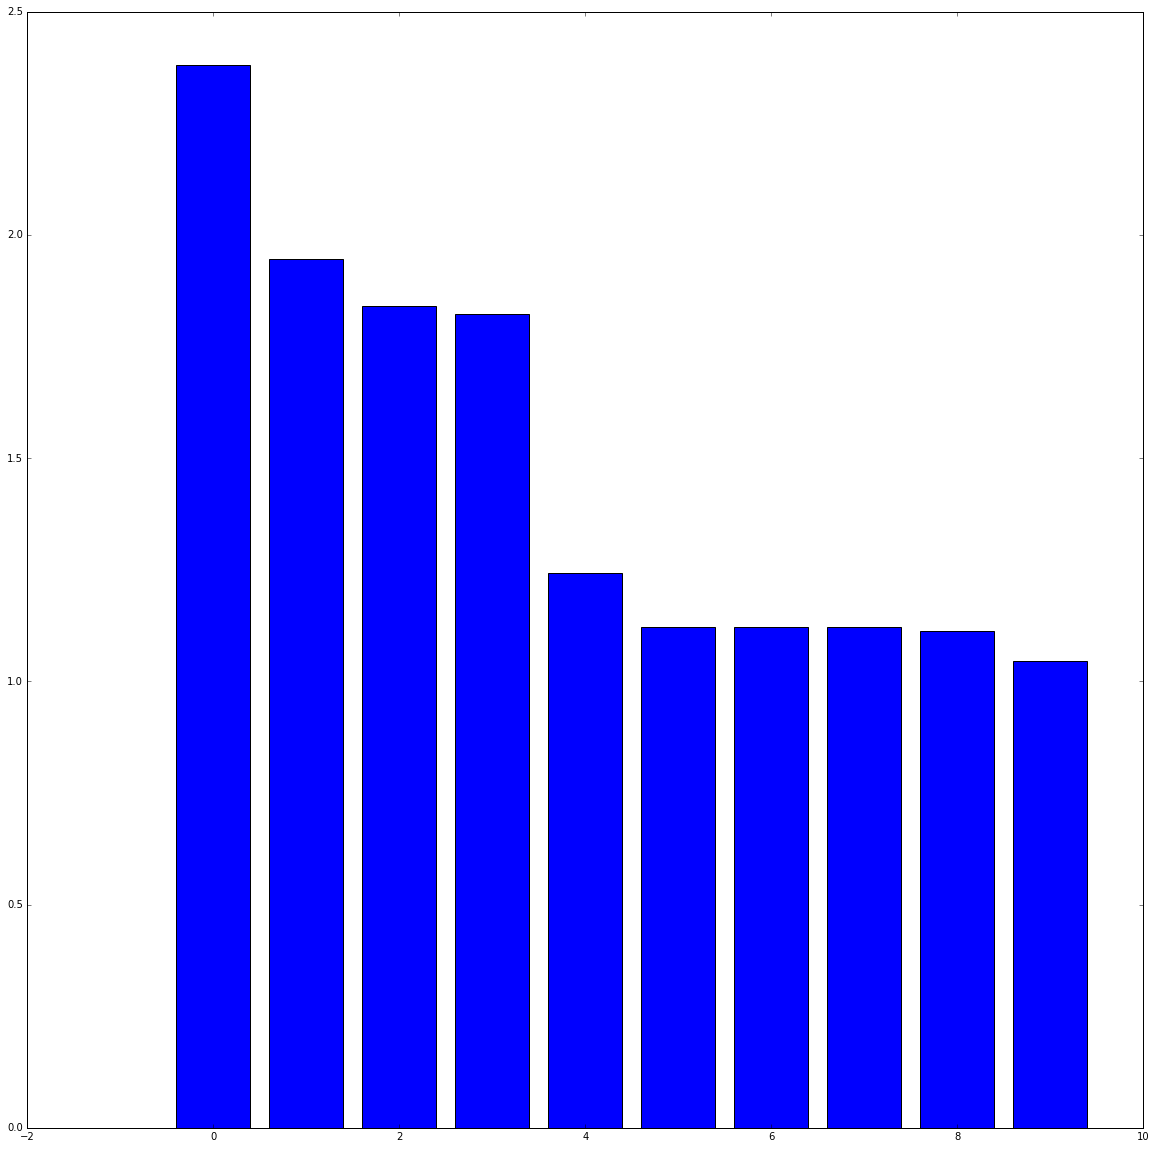

In [16]:
%matplotlib inline
from pylab import rcParams
print sorted_results.iloc[1:10,0]
plt.figure(figsize=(10,10))
rcParams['figure.figsize'] = 20,20

#plt.subplot(211)
fig, ax = plt.subplots()
#ax.set_yticklabels(sorted_results.iloc[:,0])
#ax.set_xticklabels(sorted_results.iloc[0:10:,0])

#plt.bar(range(len(sorted_results)), sorted_results[['coefficients']].values)
#plt.bar(sorted_results[['coefficients']].values,sorted_results.iloc[:,1])
#plt.barh(range(len(sorted_results.iloc[1:10,1])),sorted_results.iloc[1:10,1])
plt.bar(range(10),sorted_results.iloc[0:10,1],align='center')